In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root="/content/drive/MyDrive/Deep_learning-datasets", train=True, download=False, transform=transform)

In [ ]:
test_data = datasets.MNIST(root="/content/drive/MyDrive/Deep_learning-datasets", train=False, download=False, transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Deep_learning-datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Deep_learning-datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [ ]:
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [ ]:
for i,(X_train,y_train) in enumerate(train_data):
  break

In [ ]:
X_train.shape

torch.Size([1, 28, 28])

In [ ]:
x = X_train.view(1,1,28,28)

In [ ]:
x = F.relu(conv1(x))

In [ ]:
x.shape

torch.Size([1, 6, 26, 26])

In [ ]:
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 6, 13, 13])

In [ ]:
x = F.relu(conv2(x))

In [ ]:
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 16, 5, 5])

In [ ]:
x.view(-1,16*5*5).shape

torch.Size([1, 400])

In [ ]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    X = X.view(-1,16*5*5)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)

In [ ]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
for param in model.parameters():
  print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
import time
start_time = time.time()
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if b%600==0:
      print(f"EPOCH {i+1} BATCH {b} LOSS {loss.item()}")
  train_losses.append(loss.item())
  train_correct.append(trn_corr)
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()
  loss = criterion(y_val,y_test)
  test_losses.append(loss.item())
  test_correct.append(tst_corr)
current_time = time.time()
total = current_time - start_time
print(f'Training took {total/60} minutes')

EPOCH 1 BATCH 600 LOSS 0.040556274354457855
EPOCH 1 BATCH 1200 LOSS 0.08253474533557892
EPOCH 1 BATCH 1800 LOSS 0.3647049069404602
EPOCH 1 BATCH 2400 LOSS 0.018250251188874245
EPOCH 1 BATCH 3000 LOSS 0.008067040704190731
EPOCH 1 BATCH 3600 LOSS 0.001166942878626287
EPOCH 1 BATCH 4200 LOSS 0.5255253911018372
EPOCH 1 BATCH 4800 LOSS 0.03260819613933563
EPOCH 1 BATCH 5400 LOSS 0.007468158844858408
EPOCH 1 BATCH 6000 LOSS 0.03889675810933113
EPOCH 2 BATCH 600 LOSS 0.032828204333782196
EPOCH 2 BATCH 1200 LOSS 0.04554177075624466
EPOCH 2 BATCH 1800 LOSS 0.005784796085208654
EPOCH 2 BATCH 2400 LOSS 0.02235613949596882
EPOCH 2 BATCH 3000 LOSS 0.21643038094043732
EPOCH 2 BATCH 3600 LOSS 0.00501451687887311
EPOCH 2 BATCH 4200 LOSS 0.00045869071618653834
EPOCH 2 BATCH 4800 LOSS 0.0019295118981972337
EPOCH 2 BATCH 5400 LOSS 0.0008596166153438389
EPOCH 2 BATCH 6000 LOSS 0.08304359018802643
EPOCH 3 BATCH 600 LOSS 0.0006373372743837535
EPOCH 3 BATCH 1200 LOSS 0.0015393418725579977
EPOCH 3 BATCH 1800 

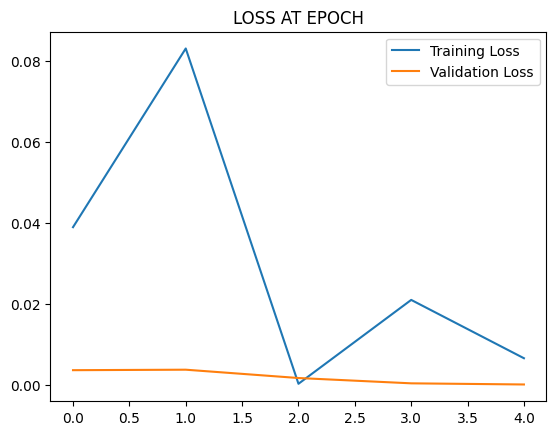

In [ ]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Validation Loss')
plt.title('LOSS AT EPOCH')
plt.legend()

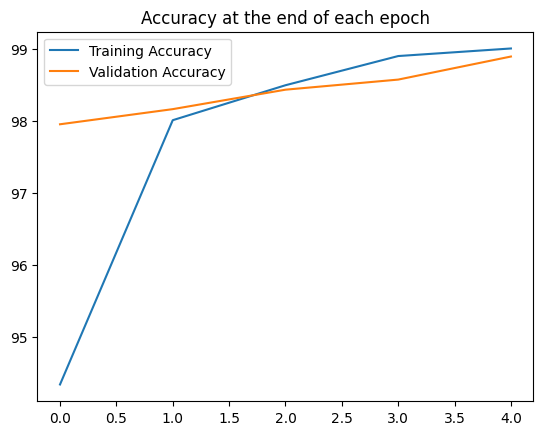

In [ ]:
plt.plot([t/600 for t in train_correct],label='Training Accuracy')
plt.plot([t/100 for t in test_correct],label='Validation Accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [ ]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for X_test,y_test in test_load_all:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct += (predicted==y_test).sum()

In [ ]:
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.2f}%')

Test accuracy: 9889/10000 =   98.89%


In [ ]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 977    3    1    0    0    2    4    1    4    0]
 [   0 1130    2    0    0    0    1    4    0    3]
 [   0    1 1022    0    0    0    0    4    2    0]
 [   0    0    3 1007    0    7    0    2    2    2]
 [   0    0    1    0  971    0    1    0    0    5]
 [   0    0    0    1    0  879    7    0    1    5]
 [   1    1    0    0    4    2  944    0    1    0]
 [   1    0    3    0    0    0    0 1013    1    2]
 [   1    0    0    2    1    1    1    1  962    8]
 [   0    0    0    0    6    1    0    3    1  984]]


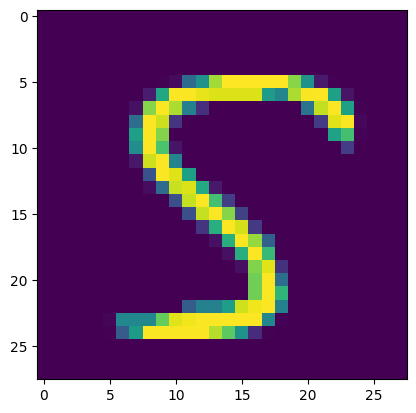

In [ ]:
plt.imshow(test_data[333][0].reshape(28,28))

In [ ]:
test_data[333][1]

5

In [ ]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[333][0].view(1,1,28,28))

In [ ]:
new_prediction.argmax().item()

5